Importing libraries

In [2]:
# python basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, math, os, re, time, random

from tqdm import tqdm

# visualizations
plt.style.use('ggplot')

# natural language processing
from collections import defaultdict
import wordcloud

# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

# for neural nets
import tensorflow as tf

Reading Dataset


●	Load the dataset of 10,000 hand-classified tweets

In [3]:
df = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 7\twitter_disaster.csv')

Part 1: Data Exploration and Preparation

Task: Data Exploration

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


●	Explore the dataset's structure using Python libraries like Pandas to understand the columns and data types.

In [5]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 7613 rows and 5 columns


In [6]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df.target.value_counts()


target
0    4342
1    3271
Name: count, dtype: int64

●	Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots.

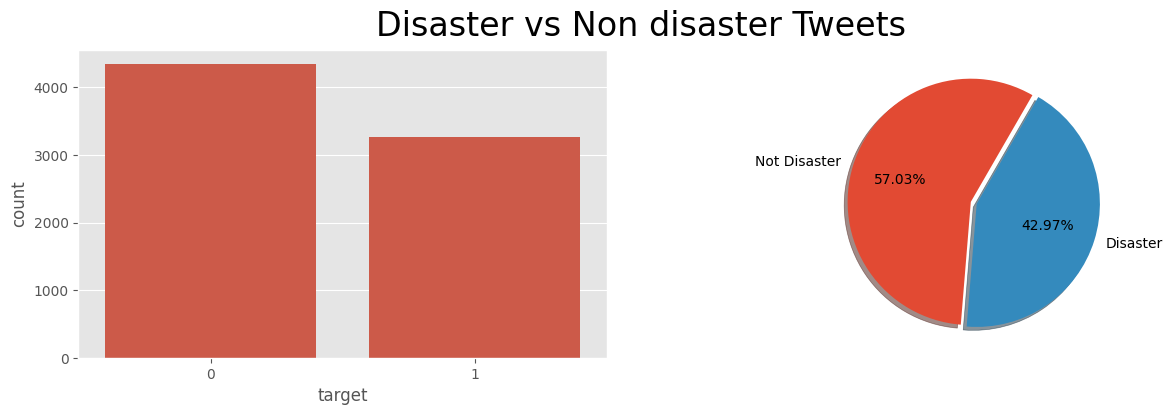

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,4), dpi=100)
sns.barplot(df['target'].value_counts(), ax=axes[0])
axes[1].pie(df['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Disaster vs Non disaster Tweets', fontsize=24)
plt.show()

There are more tweets with class 0 (No disaster) than class 1 (disaster tweets)

●	Analyze the frequency of keywords and phrases associated with disaster tweets.

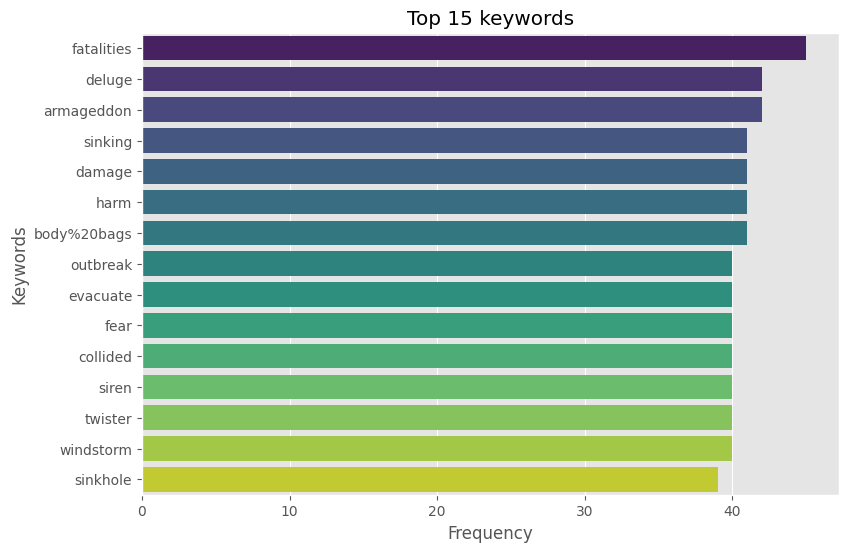

In [10]:
# most common keywords
top_keywords = df.keyword.value_counts().iloc[:15]

custom_palette = sns.color_palette("viridis", len(top_keywords))

# plotting
plt.figure(figsize = (9,6))
sns.countplot(y = df.keyword, order = top_keywords.index, palette = custom_palette)
plt.title('Top 15 keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

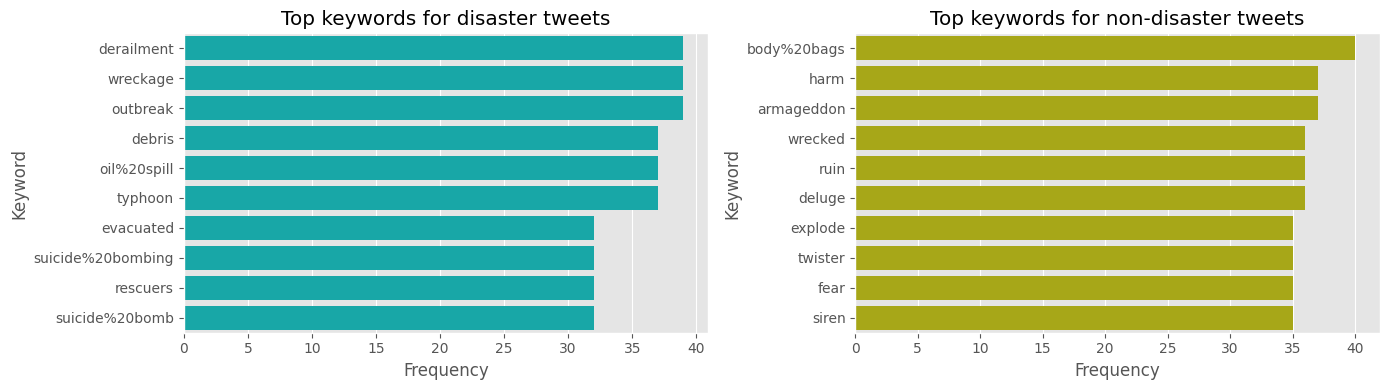

In [11]:
disaster = df[df.target == 1].keyword.value_counts().head(10)
non_disaster = df[df.target == 0].keyword.value_counts().head(10)

plt.figure(figsize = (14,4))

# plotting for disaster tweets
plt.subplot(121)
sns.barplot(x = disaster.values, y = disaster.index, color = 'c')
plt.title('Top keywords for disaster tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

# plotting for non-disaster tweets
plt.subplot(122)
sns.barplot(x = non_disaster.values, y = non_disaster.index, color = 'y')
plt.title('Top keywords for non-disaster tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.tight_layout()
plt.show()

No common top 10 keywords between disaster and non-disaster

In [12]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Filling missing values

In [13]:
# fill missing with 'unknown'
df['keyword'] = df['keyword'].fillna('unknown')
df['location'] = df['location'].fillna('none')

# add keywords to text
df['text'] = df['text'] + ' ' + df['keyword']

# drop id and keyword
columns = ['id', 'keyword']
df = df.drop(columns = columns)

In [14]:
df.isnull().sum()

location    0
text        0
target      0
dtype: int64

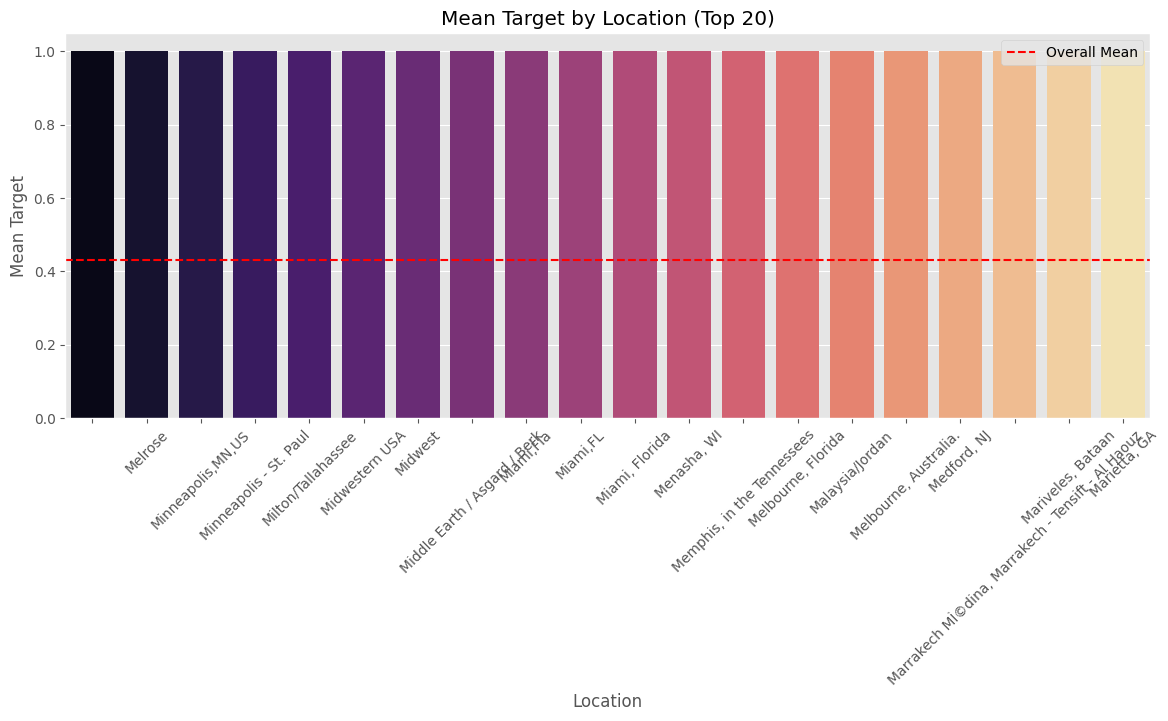

In [15]:
top_20 = df.groupby('location')['target'].mean().sort_values(ascending=False).head(20)

# creating custom color palette
num_bars = len(top_20)
custom_palette = sns.color_palette('magma', num_bars)

# plotting
plt.figure(figsize=(14,5))
sns.barplot(x=top_20.index, y=top_20.values, palette= custom_palette)
plt.axhline(np.mean(df['target']), color = 'red', linestyle = '--', label = 'Overall Mean')
plt.xticks(rotation=45)
plt.title('Mean Target by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Mean Target')
plt.legend()
plt.show()

Adding more features

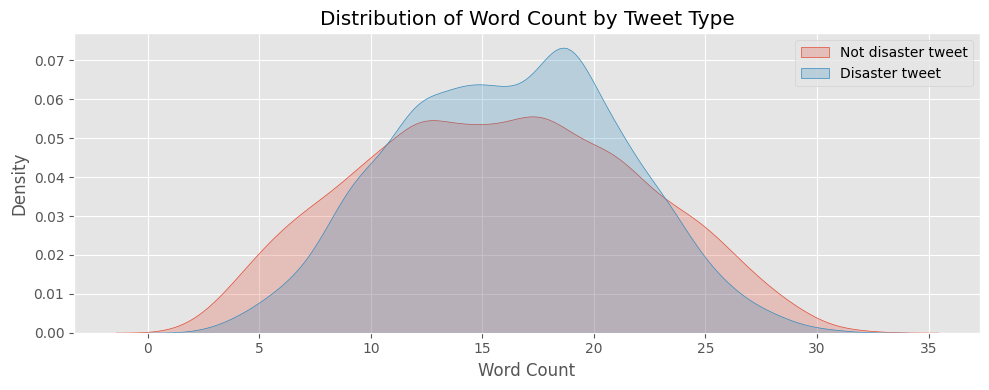

In [16]:
df['word count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['word count'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['word count'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Word Count by Tweet Type')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

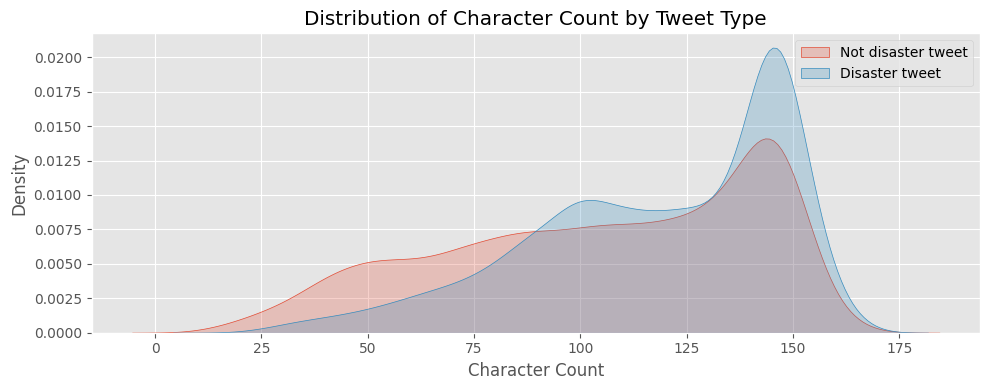

In [17]:
df['character count'] = df['text'].apply(lambda x: len(x))

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['character count'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['character count'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Character Count by Tweet Type')
plt.xlabel('Character Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

It tells us that very few disaster tweets are less than 50 characters and that the majority of them are more than 125 characters long

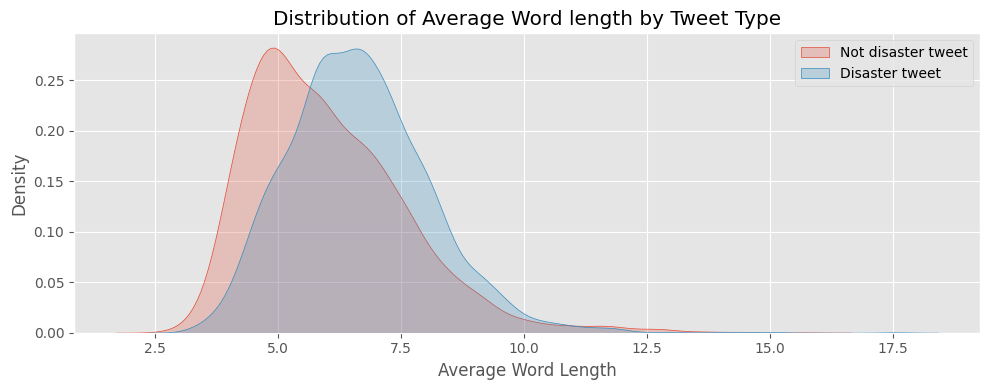

In [18]:
# define function to find average word length
def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

df['average word length'] = df['text'].apply(avg_word_length)

plt.figure(figsize=(10, 4))

# Plot KDE plots for 'word count' based on 'target' values
sns.kdeplot(df['average word length'][df['target'] == 0], fill=True, label='Not disaster tweet')
sns.kdeplot(df['average word length'][df['target'] == 1], fill=True, label='Disaster tweet')

# Set title, labels, and legend
plt.title('Distribution of Average Word length by Tweet Type')
plt.xlabel('Average Word Length')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Adding important features

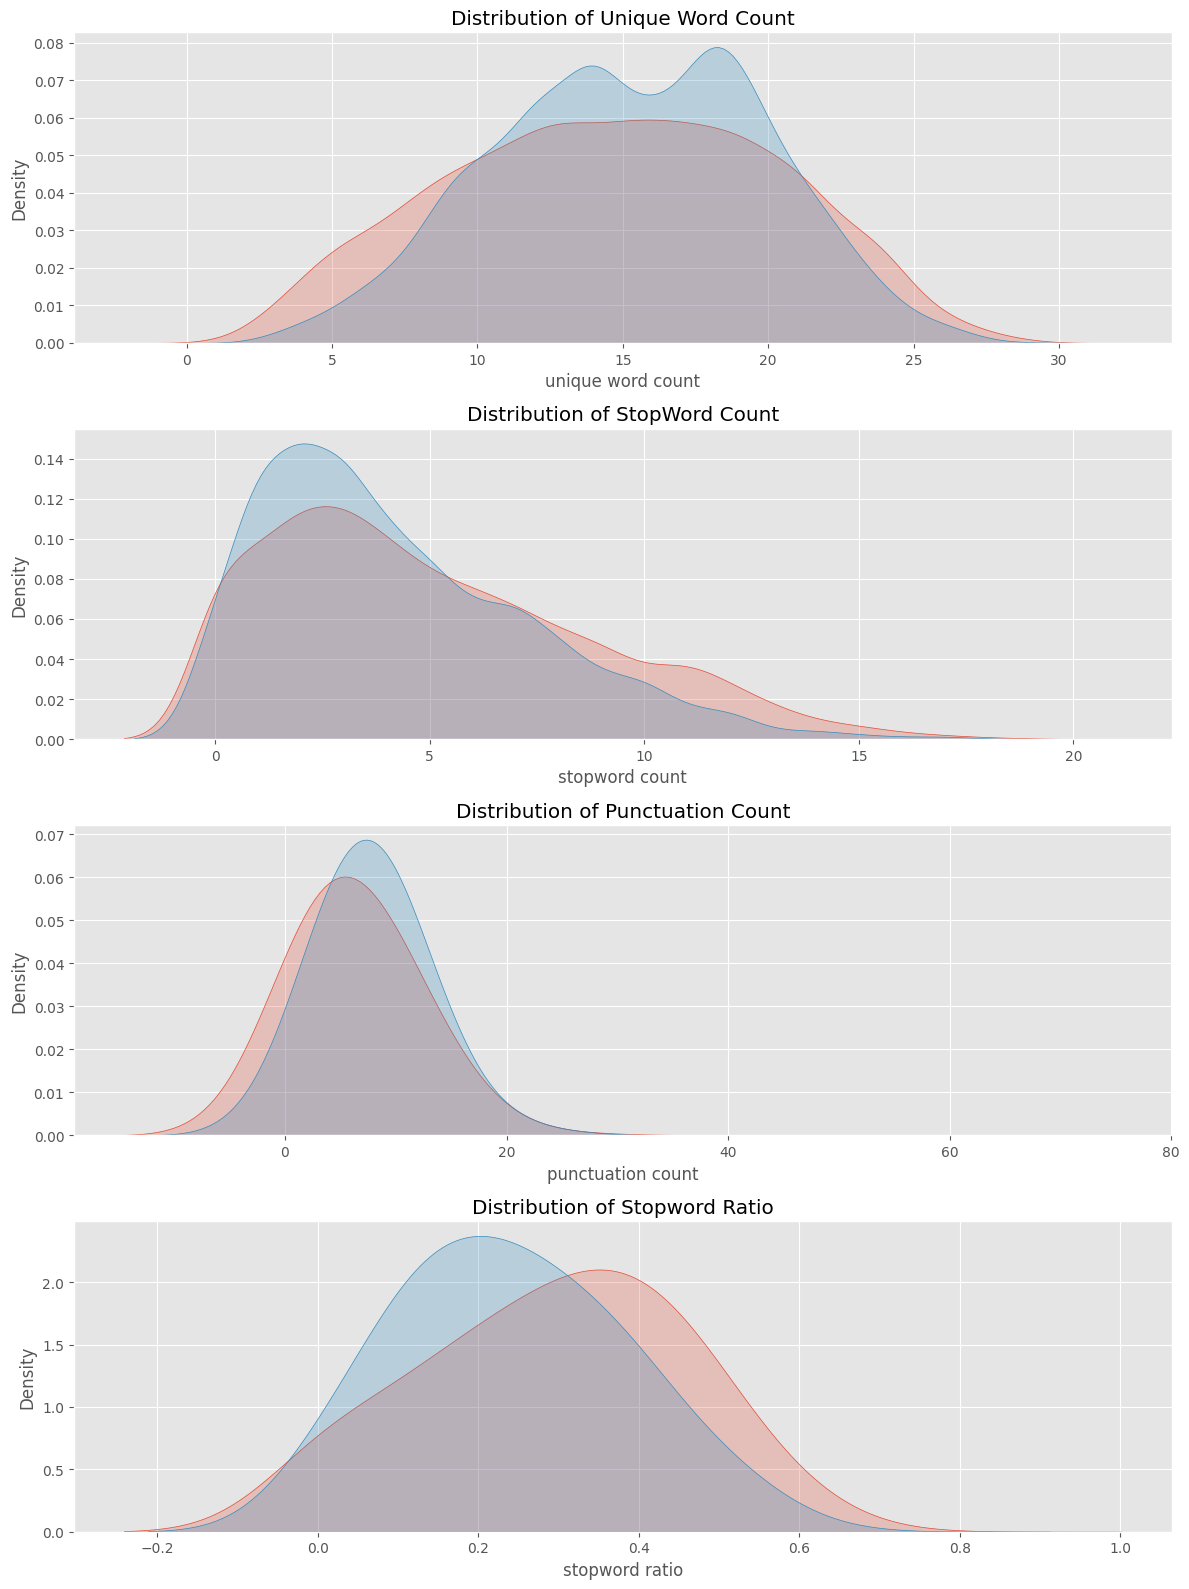

In [19]:
# adding unique word count
df['unique word count'] = df['text'].apply(lambda x: len(set(x.split())))

# adding stopword count
df['stopword count'] = df['text'].apply(lambda x: len([i for i in x.lower().split() if i in wordcloud.STOPWORDS]))

# adding url count
df['url count'] = df['text'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# adding mention count
df['mention count'] = df['text'].apply(lambda x: len([i for i in str(x) if i == '@']))

# adding hashtag count
df['hashtag count'] = df['text'].apply(lambda x: len([i for i in str(x) if i == '#']))

# adding stopword ratio
df['stopword ratio'] = df['stopword count'] / df['word count']

# adding punctuation count
df['punctuation count'] = df['text'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

df = df[:len(df)]
disaster = df['target'] == 1

# graphs to visualize newly added features
fig, axes = plt.subplots(4, figsize = (12,16))

graph1 = sns.kdeplot(df.loc[~disaster]['unique word count'], fill=True, label = 'Not Disaster', ax=axes[0])
graph1 = sns.kdeplot(df.loc[disaster]['unique word count'], fill=True, label = 'Disasater', ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')

graph2 = sns.kdeplot(df.loc[~disaster]['stopword count'], fill=True, label = 'Not Disaster', ax=axes[1])
graph2 = sns.kdeplot(df.loc[disaster]['stopword count'], fill=True, label = 'Disasater', ax=axes[1])
graph2.set_title('Distribution of StopWord Count')

graph3 = sns.kdeplot(df.loc[~disaster]['punctuation count'], fill=True, label = 'Not Disaster', ax=axes[2], bw=1)
graph3 = sns.kdeplot(df.loc[disaster]['punctuation count'], fill=True, label = 'Disasater', ax=axes[2], bw=1)
graph3.set_title('Distribution of Punctuation Count')

graph4 = sns.kdeplot(df.loc[~disaster]['stopword ratio'], fill=True, label = 'Not Disaster', ax=axes[3], bw=0.5)
graph4 = sns.kdeplot(df.loc[disaster]['stopword ratio'], fill=True, label = 'Disasater', ax=axes[3], bw=0.5)
graph4.set_title('Distribution of Stopword Ratio')

fig.tight_layout()
plt.show()



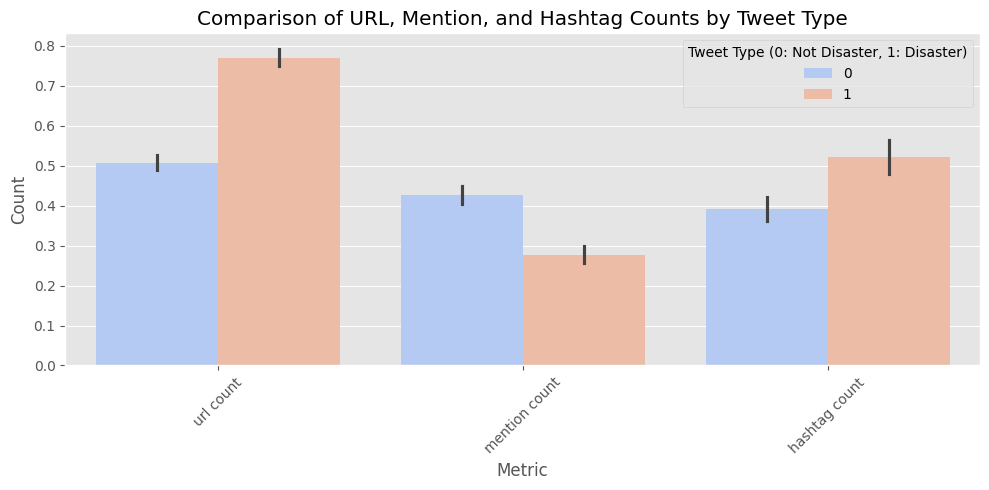

In [20]:
# Melting the DataFrame to plot multiple count metrics
df_melted = df.melt(id_vars=['target'], value_vars=['url count', 'mention count', 'hashtag count'],
                     var_name='metric', value_name='count')

# Set up the figure and axis
plt.figure(figsize=(10, 5))

# Plotting barplot for each count metric with 'target' as hue
sns.barplot(x='metric', y='count', hue='target', data=df_melted, palette='coolwarm', alpha=1)

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Comparison of URL, Mention, and Hashtag Counts by Tweet Type')

# Show the legend
plt.legend(title='Tweet Type (0: Not Disaster, 1: Disaster)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

●	Clean the text data by removing special characters, URLs, and punctuation marks.

CLEANING
We can do most of the hard work with Keras's Tokenize object, which automatically converts all words to lowercase and filters out punctuation**  

**This tokenizer has many arguements that allow us to do most of the cleaning with one line of code, so we do not need to much processing ourselves. I have included some examples of how one would manually clean text for reference:**

In [21]:
# remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

# remove urls
def remove_urls(x):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', x)

# remove html
def remove_html(x):
    html = re.compile(r'<.*?>')
    return html.sub(r'', x)

# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in wordcloud.STOPWORDS])

# remove words less than 4
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

# remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

# Applying helper functions

df['text_clean'] = df['text'].apply(lambda x: remove_urls(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_emoji(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_html(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_punctuation(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_stopwords(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_less_than(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_non_alphabet(x))
df['text_clean'] = df['text_clean'].apply(lambda x: strip_all_entities(x))

In [22]:
# checking strip_all_entities function
strip_all_entities('#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'
)

'RockyFire Update California Hwy 20 closed in both directions due to Lake County fire CAfire wildfires'

We can even spellcheck the words

In [23]:
# installing autocorrect
!pip install autocorrect

In [24]:
from autocorrect import Speller

def spell_check(x):
    spell = Speller(lang='en')
    corrected_words = [spell(word) for word in x.split()]
    corrected_sentence = ' '.join(corrected_words)

    return corrected_sentence

wrong_spelled = 'thise is my sevanth proojact'
corrected_sentence = spell_check(wrong_spelled)

print('Original Sentence:', wrong_spelled)
print('Corrected Sentence:', corrected_sentence)

Original Sentence: thise is my sevanth proojact
Corrected Sentence: this is my seventh project


In [25]:
# applying spell_check function on dataset
#df['text_clean'] = df['text_clean'].apply(lambda x: spell_check(x))

●	Tokenize the text into individual words or tokens.

In [26]:
from keras.preprocessing.text import Tokenizer

to_exclude = '*+-/()%\n[\\]{|}^_`~\t'
to_tokenize = '!"#$&?:;<=>@'
tokenizer = Tokenizer(filters = to_exclude)
text = 'Why are you so f%#@ing angry all the time?!'
text = re.sub(r'(['+to_tokenize+'])', r' \1 ', text)
tokenizer.fit_on_texts([text])

print(tokenizer.word_index)

{'why': 1, 'are': 2, 'you': 3, 'so': 4, 'f': 5, '#': 6, '@': 7, 'ing': 8, 'angry': 9, 'all': 10, 'the': 11, 'time': 12, '?': 13, '!': 14}


In [27]:
# tokenizing entire text column
#df['tokenized_text'] = df['text_clean'].apply(lambda x: re.sub(r'(['+to_tokenize+'])', r' \1 ', x))

In [28]:
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize

In [29]:
nltk.data.path.append(r'C:\Users\Niti\AppData\Roaming\nltk_data')

In [30]:
import nltk
nltk.download('punkt')

ParseError: unclosed token: line 97, column 4 (<string>)

In [31]:
df['tokenized'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [32]:
# Tokenizing the tweet base texts
#from keras.preprocessing.text import Tokenizer
#from nltk.tokenize import word_tokenize

#df['tokenized'] = df['text_clean'].apply(word_tokenize)


We can also include the `oov_token` parameter in the Keras Tokenizer object so that when the tokenizer finds words that our out of vocabulary in the test set, instead of skipping them, it includes them as a token of our choosing, we just need to ensure our token does not resemble any other words in our vocabulary.

In [33]:
from keras.preprocessing.sequence import pad_sequences
from keras import Input

tweets = [tweet for tweet in df['text']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences)
labels = df['target']
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 22730 unique tokens.
Shape of data tensor: (7613, 35)
Shape of label tensor: (7613,)


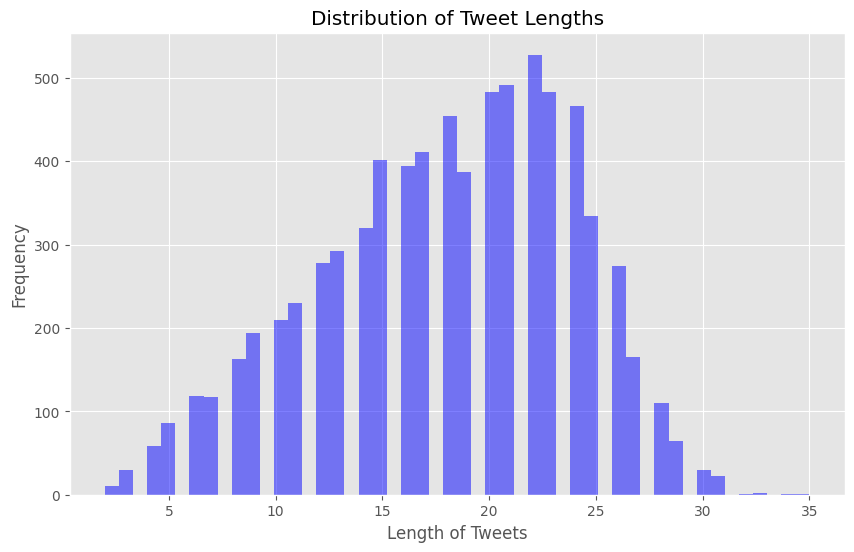

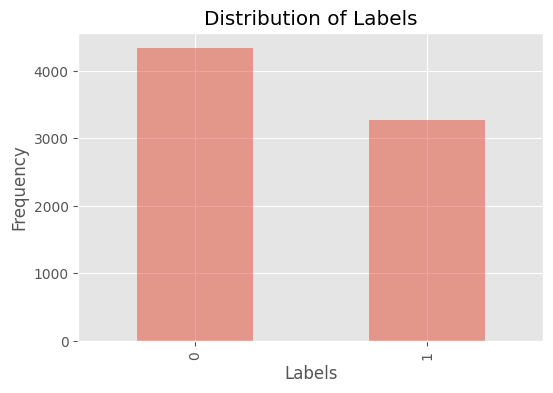

In [40]:
# Visualizing tweet lengths
plt.figure(figsize=(10, 6))
plt.hist([len(seq) for seq in sequences], bins=50, alpha = 0.5, color = 'blue')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.grid(True)
plt.show()

# Visualizing label distribution
plt.figure(figsize=(6, 4))
labels.value_counts().plot(kind='bar', alpha = 0.5)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.grid(True)
plt.show()


In [42]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Niti\AppData\Roaming\nltk_data...


True

In [44]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example function for stemming and lemmatizing a list of tokens
def stem_and_lemmatize(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return stemmed_tokens, lemmatized_tokens

# Example usage on your tokenized text column
df['stemmed'], df['lemmatized'] = zip(*df['tokenized'].apply(stem_and_lemmatize))


●	Convert text labels into numerical format (e.g., 0 for non-disaster, 1 for disaster).

In [45]:
df.head(2)

,location,text,target,word count,character count,average word length,unique word count,stopword count,url count,mention count,hashtag count,stopword ratio,punctuation count,text_clean,tokenized,stemmed,lemmatized
0,none,Our Deeds are the Reason of this #earthquake M...,1,14,77,4.571429,14,6,0,0,1,0.428571,1,Deeds Reason earthquake ALLAH Forgive unknown,"[Deeds, Reason, earthquake, ALLAH, Forgive, un...","[deed, reason, earthquak, allah, forgiv, unknown]","[Deeds, Reason, earthquake, ALLAH, Forgive, un..."
1,none,Forest fire near La Ronge Sask. Canada unknown,1,8,46,4.875000,8,0,0,0,0,0.000000,1,Forest fire near Ronge Sask Canada unknown,"[Forest, fire, near, Ronge, Sask, Canada, unkn...","[forest, fire, near, rong, sask, canada, unknown]","[Forest, fire, near, Ronge, Sask, Canada, unkn..."


In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()

X_count = count_vectorizer.fit_transform(df['text'])
feature_names_count = count_vectorizer.get_feature_names_out()
print('Type of X_count:', type(X_count))
print('Shape of X_count:', X_count.shape)
print('Vocabulary (CountVectorizer):\n', feature_names_count)

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print('Type of X_tfidf:', type(X_tfidf))
print('Shape of X_tfidf:', X_tfidf.shape)
print('Vocabulary (Tfidf-Vectorizer):\n', feature_names_tfidf)

print("Transformed Feature Matrix (CountVectorizer):\n", X_count.toarray())
print("Transformed Feature Matrix (TF-IDF Vectorizer):\n", X_tfidf.toarray())

Type of X_count: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X_count: (7613, 21667)
Vocabulary (CountVectorizer):
 ['00' '000' '0000' ... 'ûónegligence' 'ûótech' 'ûówe']
Type of X_tfidf: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X_tfidf: (7613, 21667)
Vocabulary (Tfidf-Vectorizer):
 ['00' '000' '0000' ... 'ûónegligence' 'ûótech' 'ûówe']
Transformed Feature Matrix (CountVectorizer):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Transformed Feature Matrix (TF-IDF Vectorizer):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


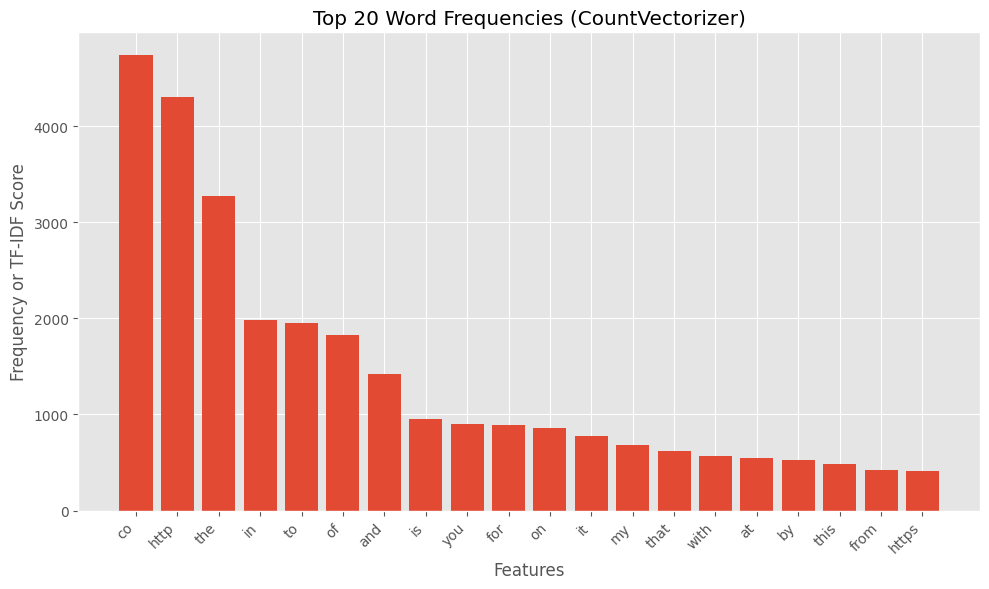

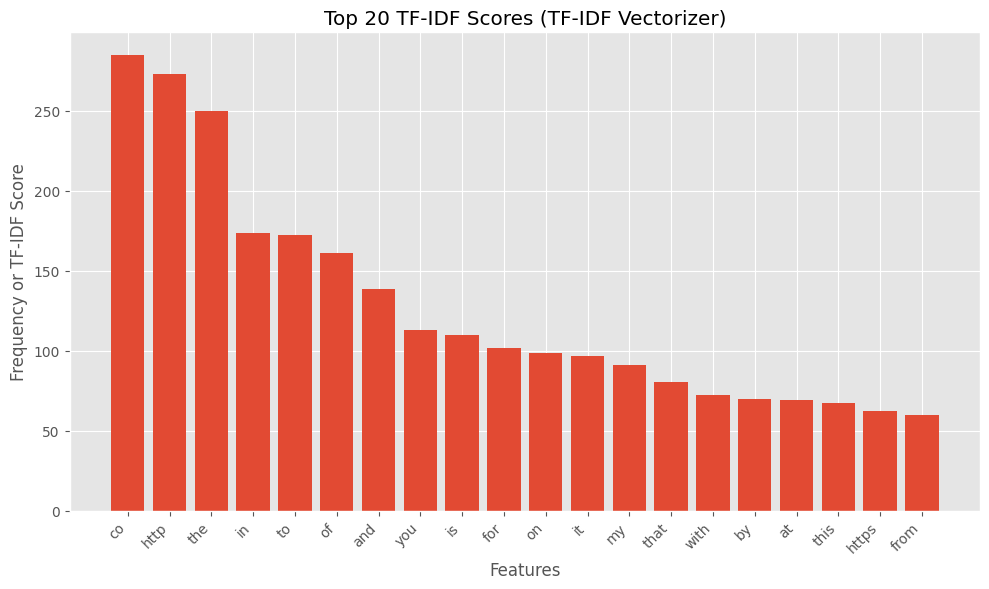

In [52]:
# Function to plot histogram of word frequencies or TF-IDF scores
def plot_top_features(matrix, feature_names, title, top_n=20):
    # Calculate sum of frequencies/scores for each feature
    feature_sum = matrix.sum(axis=0).tolist()[0]
    
    # Sort feature names and corresponding sums
    sorted_features = [feature for _, feature in sorted(zip(feature_sum, feature_names), reverse=True)[:top_n]]
    sorted_sums = sorted(feature_sum, reverse=True)[:top_n]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_sums)), sorted_sums)
    plt.xlabel('Features')
    plt.ylabel('Frequency or TF-IDF Score')
    plt.title(title)
    plt.xticks(range(len(sorted_sums)), sorted_features, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot top features for CountVectorizer and TF-IDF Vectorizer
plot_top_features(X_count, feature_names_count, 'Top 20 Word Frequencies (CountVectorizer)')
plot_top_features(X_tfidf, feature_names_tfidf, 'Top 20 TF-IDF Scores (TF-IDF Vectorizer)')


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['location_numeric'] = label_encoder.fit_transform(df['location'])

In [48]:
df.head(2)

,location,text,target,word count,character count,average word length,unique word count,stopword count,url count,mention count,hashtag count,stopword ratio,punctuation count,text_clean,tokenized,stemmed,lemmatized,location_numeric
0,none,Our Deeds are the Reason of this #earthquake M...,1,14,77,4.571429,14,6,0,0,1,0.428571,1,Deeds Reason earthquake ALLAH Forgive unknown,"[Deeds, Reason, earthquake, ALLAH, Forgive, un...","[deed, reason, earthquak, allah, forgiv, unknown]","[Deeds, Reason, earthquake, ALLAH, Forgive, un...",3140
1,none,Forest fire near La Ronge Sask. Canada unknown,1,8,46,4.875000,8,0,0,0,0,0.000000,1,Forest fire near Ronge Sask Canada unknown,"[Forest, fire, near, Ronge, Sask, Canada, unkn...","[forest, fire, near, rong, sask, canada, unknown]","[Forest, fire, near, Ronge, Sask, Canada, unkn...",3140


●	Split the dataset into training and testing sets for model development and evaluation.

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'text', 'location'], axis=1)
y = df['target']

In [50]:
# saving dataset for task 2
df.to_csv('twitter_disaster_task2.csv')